In [15]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA,ARIMAResults
import statsmodels.graphics.tsaplots as tsaplots
from math import sqrt
import warnings
warnings.filterwarnings('ignore')
import statsmodels.formula.api as smf

In [16]:
Air=pd.read_excel(r"C:\Users\AJAY\Downloads\Airlines+Data.xlsx",index_col=0,parse_dates=True)

In [17]:
Air

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-08-01,405
2002-09-01,355
2002-10-01,306


In [18]:
Air.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


In [19]:
Air.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 96 entries, 1995-01-01 to 2002-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Passengers  96 non-null     int64
dtypes: int64(1)
memory usage: 1.5 KB


In [21]:
Air.index


DatetimeIndex(['1995-01-01', '1995-02-01', '1995-03-01', '1995-04-01',
               '1995-05-01', '1995-06-01', '1995-07-01', '1995-08-01',
               '1995-09-01', '1995-10-01', '1995-11-01', '1995-12-01',
               '1996-01-01', '1996-02-01', '1996-03-01', '1996-04-01',
               '1996-05-01', '1996-06-01', '1996-07-01', '1996-08-01',
               '1996-09-01', '1996-10-01', '1996-11-01', '1996-12-01',
               '1997-01-01', '1997-02-01', '1997-03-01', '1997-04-01',
               '1997-05-01', '1997-06-01', '1997-07-01', '1997-08-01',
               '1997-09-01', '1997-10-01', '1997-11-01', '1997-12-01',
               '1998-01-01', '1998-02-01', '1998-03-01', '1998-04-01',
               '1998-05-01', '1998-06-01', '1998-07-01', '1998-08-01',
               '1998-09-01', '1998-10-01', '1998-11-01', '1998-12-01',
               '1999-01-01', '1999-02-01', '1999-03-01', '1999-04-01',
               '1999-05-01', '1999-06-01', '1999-07-01', '1999-08-01',
      

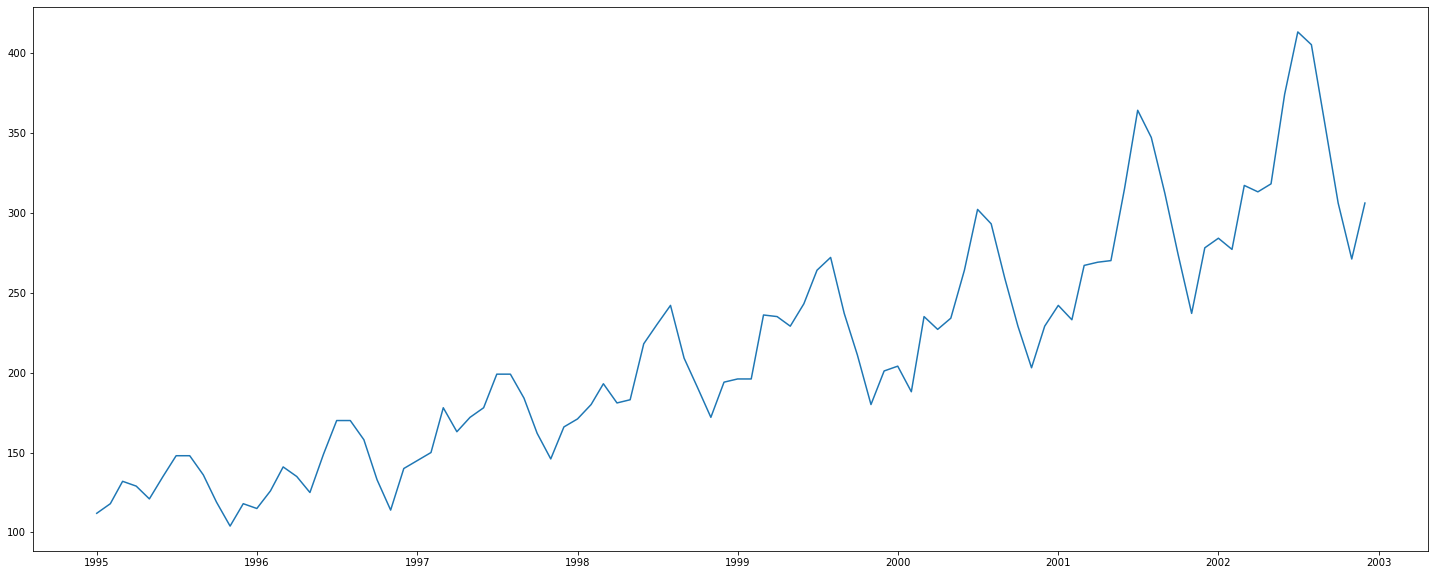

In [22]:
plt.figure(figsize=(25,10))
plt.plot(Air)

<AxesSubplot:ylabel='Frequency'>

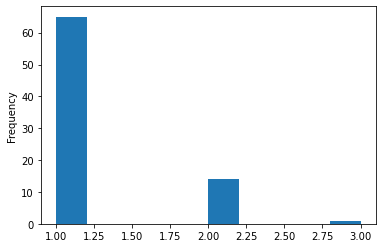

In [23]:
Air.Passengers.value_counts(ascending=True).plot(kind="hist")

<AxesSubplot:ylabel='Density'>

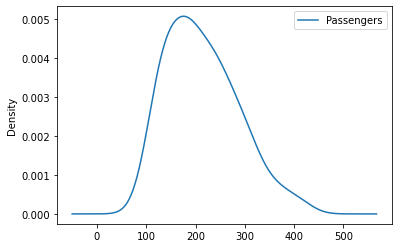

In [24]:
Air.plot(kind='kde')

In [34]:
Air=pd.read_excel(r"C:\Users\AJAY\Downloads\Airlines+Data.xlsx",index_col=0,parse_dates=True,squeeze=True)
Air

Month
1995-01-01    112
1995-02-01    118
1995-03-01    132
1995-04-01    129
1995-05-01    121
             ... 
2002-08-01    405
2002-09-01    355
2002-10-01    306
2002-11-01    271
2002-12-01    306
Name: Passengers, Length: 96, dtype: int64

In [35]:
type(Air)

pandas.core.series.Series

In [36]:
group=Air.groupby(pd.Grouper(freq='A'))
group

In [37]:
years = pd.DataFrame()

for name, group in group:
    years[name.year] = group.values

years

,1995,1996,1997,1998,1999,2000,2001,2002
0,112,115,145,171,196,204,242,284
1,118,126,150,180,196,188,233,277
2,132,141,178,193,236,235,267,317
3,129,135,163,181,235,227,269,313
4,121,125,172,183,229,234,270,318
5,135,149,178,218,243,264,315,374
6,148,170,199,230,264,302,364,413
7,148,170,199,242,272,293,347,405
8,136,158,184,209,237,259,312,355
9,119,133,162,191,211,229,274,306


<AxesSubplot:>

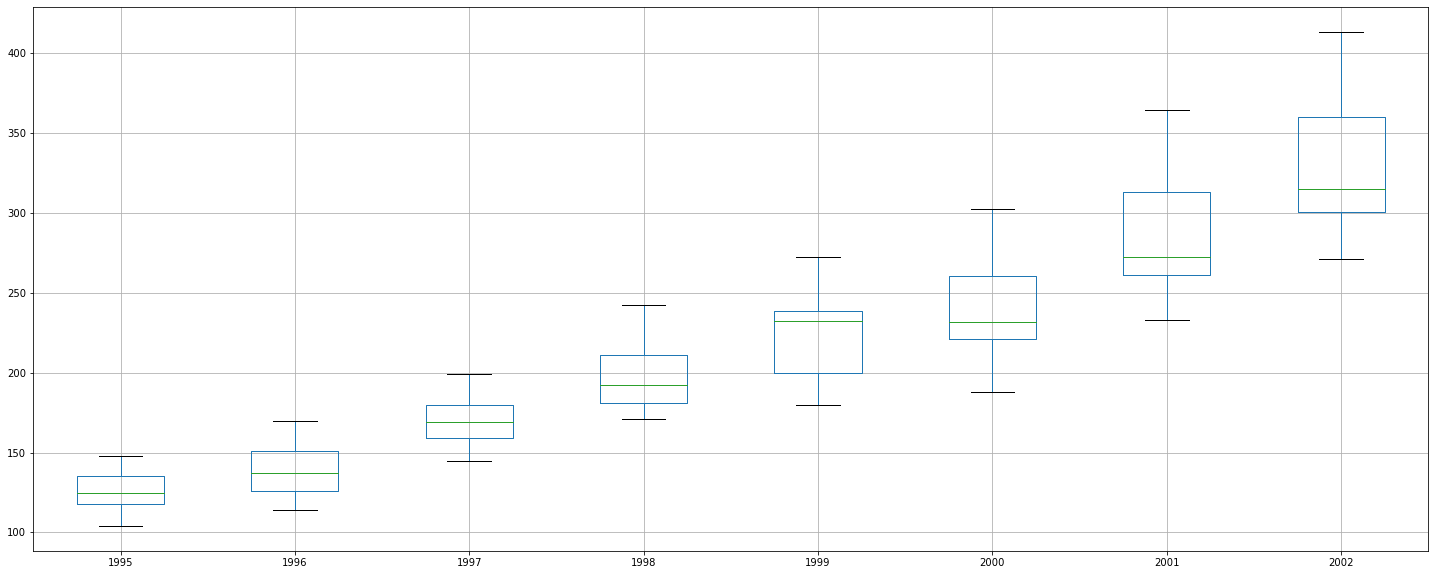

In [38]:
plt.figure(figsize=(25,10))
years.boxplot()

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

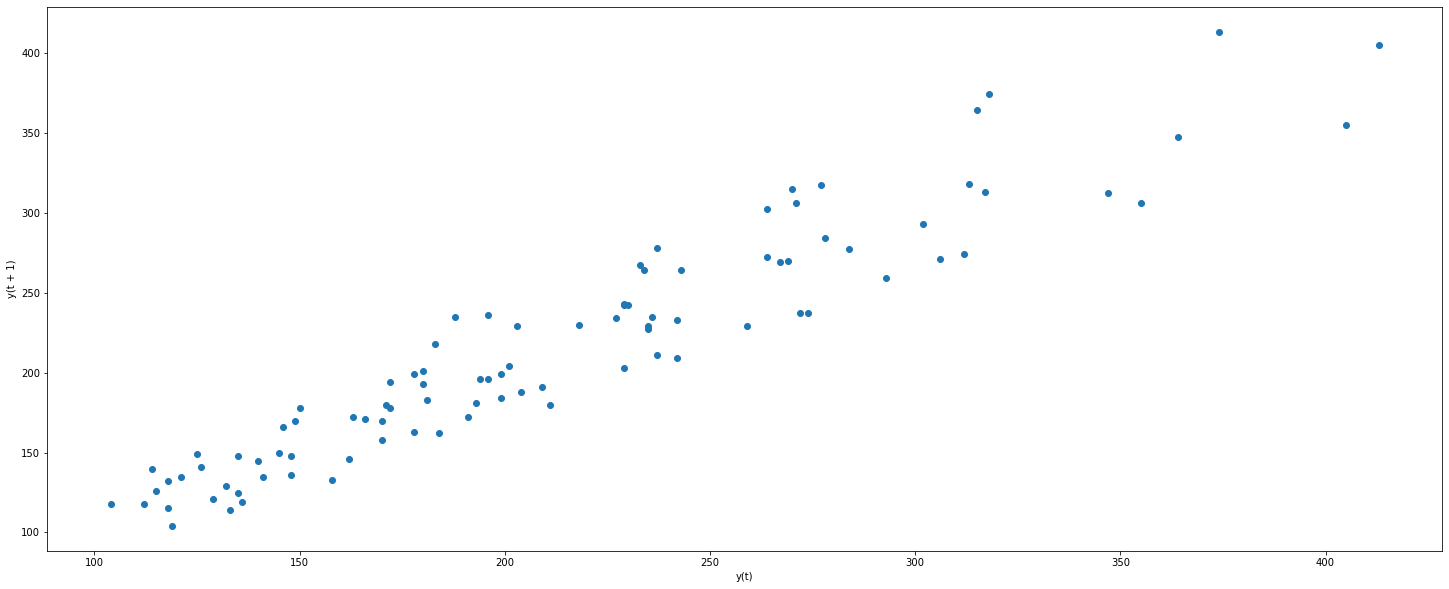

In [39]:
# create a scatter plot
plt.figure(figsize=(25,10))
pd.plotting.lag_plot(Air)

# Sampling and Basic Transformations

In [40]:
Air=pd.read_excel(r"C:\Users\AJAY\Downloads\Airlines+Data.xlsx",index_col=0,parse_dates=True,squeeze=True)
Air

Month
1995-01-01    112
1995-02-01    118
1995-03-01    132
1995-04-01    129
1995-05-01    121
             ... 
2002-08-01    405
2002-09-01    355
2002-10-01    306
2002-11-01    271
2002-12-01    306
Name: Passengers, Length: 96, dtype: int64

In [41]:
Air.shape

(96,)

In [43]:
upsampled=Air.resample('D').mean()
upsampled.head(10)

Month
1995-01-01    112.0
1995-01-02      NaN
1995-01-03      NaN
1995-01-04      NaN
1995-01-05      NaN
1995-01-06      NaN
1995-01-07      NaN
1995-01-08      NaN
1995-01-09      NaN
1995-01-10      NaN
Freq: D, Name: Passengers, dtype: float64

In [44]:
interpole=upsampled.interpolate(method='linear')
interpole.head(10)

Month
1995-01-01    112.000000
1995-01-02    112.193548
1995-01-03    112.387097
1995-01-04    112.580645
1995-01-05    112.774194
1995-01-06    112.967742
1995-01-07    113.161290
1995-01-08    113.354839
1995-01-09    113.548387
1995-01-10    113.741935
Freq: D, Name: Passengers, dtype: float64

<AxesSubplot:xlabel='Month'>

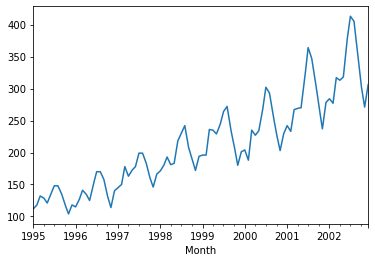

In [45]:
interpole.plot()

<AxesSubplot:xlabel='Month'>

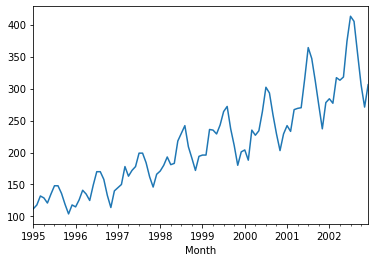

In [46]:
Air.plot()

# Downsampling Data

In [47]:
resample=Air.resample('Q')
quarterly_mean_sales=resample.mean()

<AxesSubplot:xlabel='Month'>

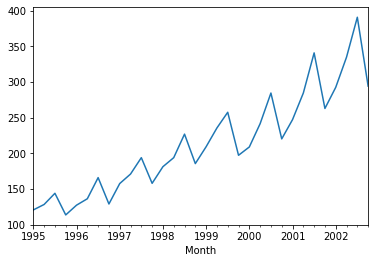

In [48]:
quarterly_mean_sales.plot()

# Tranformations

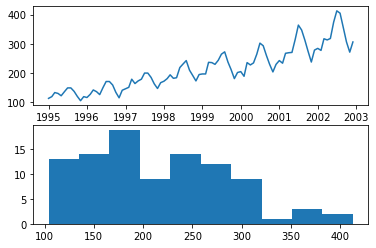

In [49]:
plt.subplot(211)
plt.plot(Air)
plt.subplot(212)
plt.hist(Air)

plt.show()

# Square Root Transform

In [50]:
SD=pd.DataFrame(np.sqrt(Air.values),columns=['Passengers'])

In [51]:
SD

,Passengers
0,10.583005
1,10.862780
2,11.489125
3,11.357817
4,11.000000
...,...
91,20.124612
92,18.841444
93,17.492856
94,16.462078


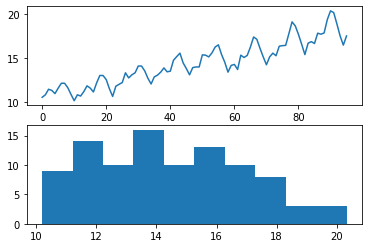

In [53]:
plt.subplot(211)
plt.plot(SD['Passengers'])

plt.subplot(212)
plt.hist(SD['Passengers'])
plt.show()

In [54]:
## Log Transform
SD=pd.DataFrame(np.log(Air.values),columns=['Passengers'])

In [55]:
SD

,Passengers
0,4.718499
1,4.770685
2,4.882802
3,4.859812
4,4.795791
...,...
91,6.003887
92,5.872118
93,5.723585
94,5.602119


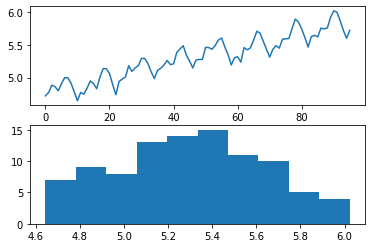

In [57]:
plt.subplot(211)
plt.plot(SD['Passengers'])

plt.subplot(212)
plt.hist(SD['Passengers'])
plt.show()


In [58]:
quarterly_mean_sales.head()

Month
1995-03-31    120.666667
1995-06-30    128.333333
1995-09-30    144.000000
1995-12-31    113.666667
1996-03-31    127.333333
Freq: Q-DEC, Name: Passengers, dtype: float64

# Forecasting - Model Based Methods

In [59]:
Air=pd.read_excel(r"C:\Users\AJAY\Downloads\Airlines+Data.xlsx")

In [60]:
Air

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


<AxesSubplot:>

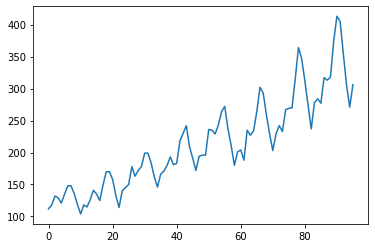

In [61]:
Air['Passengers'].plot()

In [62]:
Air["month"]=Air['Month'].dt.strftime("%b")
Air["year"]=Air['Month'].dt.strftime("%Y")

In [63]:
Air

,Month,Passengers,month,year
0,1995-01-01,112,Jan,1995
1,1995-02-01,118,Feb,1995
2,1995-03-01,132,Mar,1995
3,1995-04-01,129,Apr,1995
4,1995-05-01,121,May,1995
...,...,...,...,...
91,2002-08-01,405,Aug,2002
92,2002-09-01,355,Sep,2002
93,2002-10-01,306,Oct,2002
94,2002-11-01,271,Nov,2002


In [68]:
Air['t']=np.arange(1,97)
Air['t_square']=np.square(Air.t)
Air['log_Passengers']=np.log(Air.Passengers)
Air2=pd.get_dummies(Air['month'])
Air2

,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
91,0,1,0,0,0,0,0,0,0,0,0,0
92,0,0,0,0,0,0,0,0,0,0,0,1
93,0,0,0,0,0,0,0,0,0,0,1,0
94,0,0,0,0,0,0,0,0,0,1,0,0


In [69]:
Air

,Month,Passengers,month,year,t,t_square,log_Passengers
0,1995-01-01,112,Jan,1995,1,1,4.718499
1,1995-02-01,118,Feb,1995,2,4,4.770685
2,1995-03-01,132,Mar,1995,3,9,4.882802
3,1995-04-01,129,Apr,1995,4,16,4.859812
4,1995-05-01,121,May,1995,5,25,4.795791
...,...,...,...,...,...,...,...
91,2002-08-01,405,Aug,2002,92,8464,6.003887
92,2002-09-01,355,Sep,2002,93,8649,5.872118
93,2002-10-01,306,Oct,2002,94,8836,5.723585
94,2002-11-01,271,Nov,2002,95,9025,5.602119


In [70]:
Air2

,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
91,0,1,0,0,0,0,0,0,0,0,0,0
92,0,0,0,0,0,0,0,0,0,0,0,1
93,0,0,0,0,0,0,0,0,0,0,1,0
94,0,0,0,0,0,0,0,0,0,1,0,0


In [73]:
Air=pd.concat([Air,Air2],axis=1)

In [74]:
Air

,Month,Passengers,month,year,t,t_square,log_Passengers,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,1995-01-01,112,Jan,1995,1,1,4.718499,0,0,0,0,1,0,0,0,0,0,0,0
1,1995-02-01,118,Feb,1995,2,4,4.770685,0,0,0,1,0,0,0,0,0,0,0,0
2,1995-03-01,132,Mar,1995,3,9,4.882802,0,0,0,0,0,0,0,1,0,0,0,0
3,1995-04-01,129,Apr,1995,4,16,4.859812,1,0,0,0,0,0,0,0,0,0,0,0
4,1995-05-01,121,May,1995,5,25,4.795791,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,Aug,2002,92,8464,6.003887,0,1,0,0,0,0,0,0,0,0,0,0
92,2002-09-01,355,Sep,2002,93,8649,5.872118,0,0,0,0,0,0,0,0,0,0,0,1
93,2002-10-01,306,Oct,2002,94,8836,5.723585,0,0,0,0,0,0,0,0,0,0,1,0
94,2002-11-01,271,Nov,2002,95,9025,5.602119,0,0,0,0,0,0,0,0,0,1,0,0


In [76]:
Train=Air.head(50)
Test=Air.tail(30)

In [77]:
Train

,Month,Passengers,month,year,t,t_square,log_Passengers,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,1995-01-01,112,Jan,1995,1,1,4.718499,0,0,0,0,1,0,0,0,0,0,0,0
1,1995-02-01,118,Feb,1995,2,4,4.770685,0,0,0,1,0,0,0,0,0,0,0,0
2,1995-03-01,132,Mar,1995,3,9,4.882802,0,0,0,0,0,0,0,1,0,0,0,0
3,1995-04-01,129,Apr,1995,4,16,4.859812,1,0,0,0,0,0,0,0,0,0,0,0
4,1995-05-01,121,May,1995,5,25,4.795791,0,0,0,0,0,0,0,0,1,0,0,0
5,1995-06-01,135,Jun,1995,6,36,4.905275,0,0,0,0,0,0,1,0,0,0,0,0
6,1995-07-01,148,Jul,1995,7,49,4.997212,0,0,0,0,0,1,0,0,0,0,0,0
7,1995-08-01,148,Aug,1995,8,64,4.997212,0,1,0,0,0,0,0,0,0,0,0,0
8,1995-09-01,136,Sep,1995,9,81,4.912655,0,0,0,0,0,0,0,0,0,0,0,1
9,1995-10-01,119,Oct,1995,10,100,4.779123,0,0,0,0,0,0,0,0,0,0,1,0


In [78]:
Test

,Month,Passengers,month,year,t,t_square,log_Passengers,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
66,2000-07-01,302,Jul,2000,67,4489,5.710427,0,0,0,0,0,1,0,0,0,0,0,0
67,2000-08-01,293,Aug,2000,68,4624,5.680173,0,1,0,0,0,0,0,0,0,0,0,0
68,2000-09-01,259,Sep,2000,69,4761,5.556828,0,0,0,0,0,0,0,0,0,0,0,1
69,2000-10-01,229,Oct,2000,70,4900,5.433722,0,0,0,0,0,0,0,0,0,0,1,0
70,2000-11-01,203,Nov,2000,71,5041,5.313206,0,0,0,0,0,0,0,0,0,1,0,0
71,2000-12-01,229,Dec,2000,72,5184,5.433722,0,0,1,0,0,0,0,0,0,0,0,0
72,2001-01-01,242,Jan,2001,73,5329,5.488938,0,0,0,0,1,0,0,0,0,0,0,0
73,2001-02-01,233,Feb,2001,74,5476,5.451038,0,0,0,1,0,0,0,0,0,0,0,0
74,2001-03-01,267,Mar,2001,75,5625,5.587249,0,0,0,0,0,0,0,1,0,0,0,0
75,2001-04-01,269,Apr,2001,76,5776,5.594711,1,0,0,0,0,0,0,0,0,0,0,0


In [79]:
#Linear Model
linear_model=smf.ols('Passengers~t',data=Train).fit()
pred_linear=pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear=np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_linear))**2))
rmse_linear

52.64427286058667

In [84]:
# Exponential 
Exp = smf.ols('log_Passengers~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp


43.698302581126484

In [86]:
# Quadratic
Quad = smf.ols('Passengers~t+t_square',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_square"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_Quad))**2))
rmse_Quad


42.12350377982302

In [89]:
#Additive seasonality 
add_sea = smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea))**2))
rmse_add_sea

140.3001787834451

In [88]:
#Additive Seasonality Quadratic 
add_sea_Quad = smf.ols('Passengers~t+t_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','t','t_square']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

40.23516826296999

In [109]:
##Multiplicative Seasonality
Mul_sea = smf.ols('log_Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

142.77233781105772

In [91]:

#Multiplicative Additive Seasonality 
Mul_Add_sea = smf.ols('log_Passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea

27.86759160300508

In [108]:
##Multiplicative Seasonality Quadratic
mult_sea_Quad = smf.ols('log_Passengers~t+t_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_mult_sea_quad = pd.Series(mult_sea_Quad.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','t','t_square']]))
rmse_mult_sea_quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_mult_sea_quad))**2))
rmse_mult_sea_quad

293.85051276482045

In [93]:
# Comparing the results
data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
6,rmse_Mult_add_sea,27.867592
4,rmse_add_sea_quad,40.235168
2,rmse_Quad,42.123504
1,rmse_Exp,43.698303
0,rmse_linear,52.644273
3,rmse_add_sea,140.300179
5,rmse_Mult_sea,142.772338


In [94]:
model_full=smf.ols('log_Passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Air).fit()

In [111]:
SD_new=pd.Series(model_full.predict(Air))

SD_new

0     4.692963
1     4.703487
2     4.846666
3     4.813814
4     4.807291
        ...   
91    5.978339
92    5.868100
93    5.737989
94    5.607538
95    5.744085
Length: 96, dtype: float64

In [112]:
Air

,Month,Passengers,month,year,t,t_square,log_Passengers,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,forecasted_Passengers,new_Passengers
0,1995-01-01,112,Jan,1995,1,1,4.718499,0,0,0,0,1,0,0,0,0,0,0,0,109.176148,4.692963
1,1995-02-01,118,Feb,1995,2,4,4.770685,0,0,0,1,0,0,0,0,0,0,0,0,110.331245,4.703487
2,1995-03-01,132,Mar,1995,3,9,4.882802,0,0,0,0,0,0,0,1,0,0,0,0,127.315234,4.846666
3,1995-04-01,129,Apr,1995,4,16,4.859812,1,0,0,0,0,0,0,0,0,0,0,0,123.200587,4.813814
4,1995-05-01,121,May,1995,5,25,4.795791,0,0,0,0,0,0,0,0,1,0,0,0,122.399578,4.807291
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,Aug,2002,92,8464,6.003887,0,1,0,0,0,0,0,0,0,0,0,0,394.784174,5.978339
92,2002-09-01,355,Sep,2002,93,8649,5.872118,0,0,0,0,0,0,0,0,0,0,0,1,353.576683,5.868100
93,2002-10-01,306,Oct,2002,94,8836,5.723585,0,0,0,0,0,0,0,0,0,0,1,0,310.439400,5.737989
94,2002-11-01,271,Nov,2002,95,9025,5.602119,0,0,0,0,0,0,0,0,0,1,0,0,272.472660,5.607538


In [113]:
Air['forecasted_Passengers']=pd.Series(np.exp(SD_new))

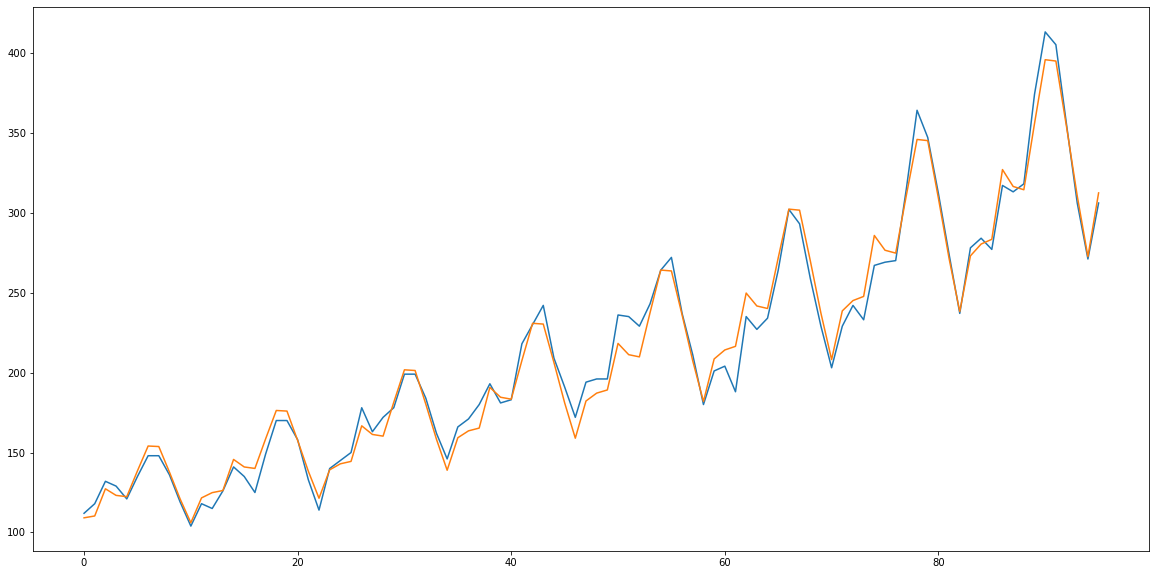

In [114]:
plt.figure(figsize=(20,10))
plt.plot(Air[['Passengers','forecasted_Passengers']].reset_index(drop=True))

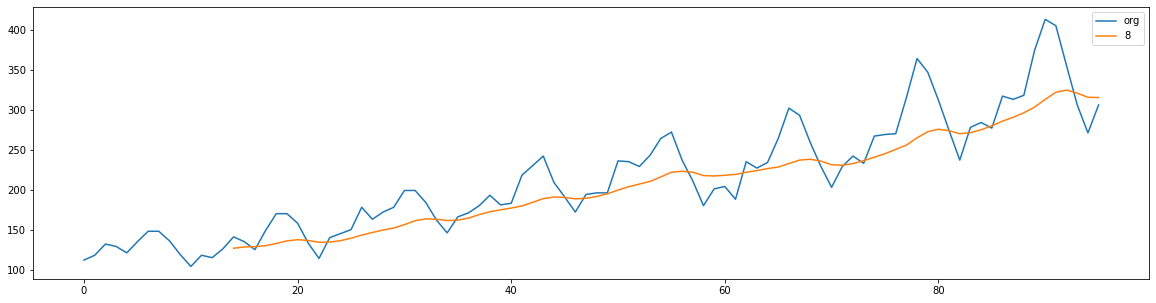

In [115]:
plt.figure(figsize=(20,5))
Air['Passengers'].plot(label="org")
Air["Passengers"].rolling(15).mean().plot(label=str(8))
plt.legend(loc='best')

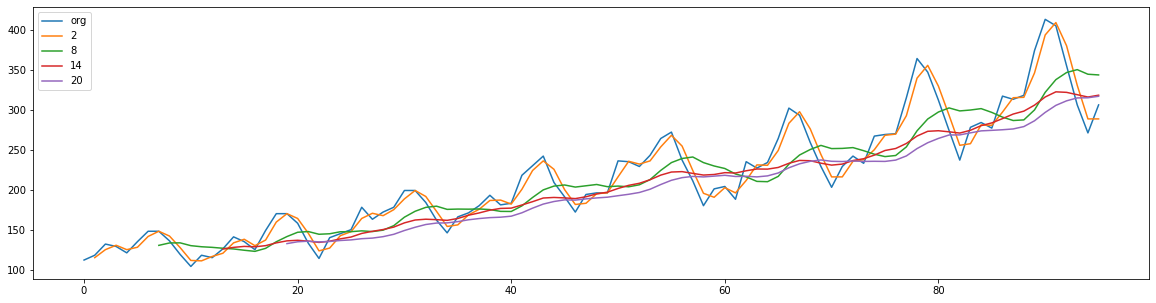

In [116]:
plt.figure(figsize=(20,5))
Air['Passengers'].plot(label="org")
for i in range(2,24,6):
    Air["Passengers"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')